In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | lemon tree passage
Processing Record 3 of Set 1 | vancouver
Processing Record 4 of Set 1 | fort nelson
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | sarkand
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kaeo
Processing Record 10 of Set 1 | san carlos
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | chimbote
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | kavaratti
Processing Rec

Processing Record 39 of Set 4 | chernyshevskiy
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | armidale
Processing Record 42 of Set 4 | severo-kurilsk
Processing Record 43 of Set 4 | praia da vitoria
Processing Record 44 of Set 4 | coihaique
Processing Record 45 of Set 4 | oyama
Processing Record 46 of Set 4 | mitzic
Processing Record 47 of Set 4 | puri
Processing Record 48 of Set 4 | muyezerskiy
Processing Record 49 of Set 4 | bonavista
Processing Record 50 of Set 4 | mananjary
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | chapleau
Processing Record 3 of Set 5 | basco
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | verkhnevilyuysk
Processing Record 6 of Set 5 | katobu
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | itapetininga
Processing Record 9 of Set 5 | westport
Processing Record 10 of Set 5 | cherskiy
Processing Record 11 of Set 5 | vardo
Processing Record 12 of Set 5 | taltal
Processin

Processing Record 29 of Set 8 | port hardy
Processing Record 30 of Set 8 | north bend
Processing Record 31 of Set 8 | toliary
City not found. Skipping...
Processing Record 32 of Set 8 | suzhou
Processing Record 33 of Set 8 | iisalmi
Processing Record 34 of Set 8 | mocuba
Processing Record 35 of Set 8 | impfondo
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | tkvarcheli
City not found. Skipping...
Processing Record 38 of Set 8 | manggar
Processing Record 39 of Set 8 | chicama
Processing Record 40 of Set 8 | berdyuzhye
City not found. Skipping...
Processing Record 41 of Set 8 | kalianget
Processing Record 42 of Set 8 | pokhara
Processing Record 43 of Set 8 | kenora
Processing Record 44 of Set 8 | molina
Processing Record 45 of Set 8 | mitsamiouli
Processing Record 46 of Set 8 | dongsheng
Processing Record 47 of Set 8 | dingle
Processing Record 48 of Set 8 | lodwar
Processing Record 49 of Set 8 | san marcos
Processing Record 50 of Set 8 | farafangana
Processing R

Processing Record 15 of Set 12 | abengourou
Processing Record 16 of Set 12 | hit
Processing Record 17 of Set 12 | pahrump
Processing Record 18 of Set 12 | topolevo
Processing Record 19 of Set 12 | talaya
Processing Record 20 of Set 12 | northam
Processing Record 21 of Set 12 | batouri
Processing Record 22 of Set 12 | verkhnyaya inta
Processing Record 23 of Set 12 | qurayyat
Processing Record 24 of Set 12 | khani
Processing Record 25 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 26 of Set 12 | rockport
Processing Record 27 of Set 12 | athabasca
Processing Record 28 of Set 12 | moree
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | marathon
Processing Record 31 of Set 12 | tawang
Processing Record 32 of Set 12 | lupiro
Processing Record 33 of Set 12 | mezen
Processing Record 34 of Set 12 | mangrol
Processing Record 35 of Set 12 | maues
Processing Record 36 of Set 12 | husavik
Processing Record 37 of Set 12 | murupara
Processing 

In [7]:
len(city_data)

563

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carutapera,-1.20,-46.02,79.36,76,88,7.23,BR,2020-10-23 20:45:33
1,Lemon Tree Passage,-32.73,152.04,66.99,100,90,5.82,AU,2020-10-23 20:45:33
2,Vancouver,49.25,-123.12,41.00,93,90,14.99,CA,2020-10-23 20:44:06
3,Fort Nelson,58.81,-122.70,28.40,39,40,9.17,CA,2020-10-23 20:45:34
4,Port Lincoln,-34.73,135.87,54.66,77,94,20.76,AU,2020-10-23 20:43:50
5,Sarkand,45.41,79.92,38.98,73,100,10.71,KZ,2020-10-23 20:45:34
6,Mount Gambier,-37.83,140.77,50.00,87,75,17.22,AU,2020-10-23 20:43:46
7,Rikitea,-23.12,-134.97,74.52,77,46,7.31,PF,2020-10-23 20:45:34
8,Kaeo,-35.10,173.78,64.99,94,89,4.00,NZ,2020-10-23 20:44:11
9,San Carlos,9.66,-68.58,84.18,81,71,1.59,VE,2020-10-23 20:44:30


In [9]:
arranged_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[arranged_city_data]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carutapera,BR,2020-10-23 20:45:33,-1.20,-46.02,79.36,76,88,7.23
1,Lemon Tree Passage,AU,2020-10-23 20:45:33,-32.73,152.04,66.99,100,90,5.82
2,Vancouver,CA,2020-10-23 20:44:06,49.25,-123.12,41.00,93,90,14.99
3,Fort Nelson,CA,2020-10-23 20:45:34,58.81,-122.70,28.40,39,40,9.17
4,Port Lincoln,AU,2020-10-23 20:43:50,-34.73,135.87,54.66,77,94,20.76
5,Sarkand,KZ,2020-10-23 20:45:34,45.41,79.92,38.98,73,100,10.71
6,Mount Gambier,AU,2020-10-23 20:43:46,-37.83,140.77,50.00,87,75,17.22
7,Rikitea,PF,2020-10-23 20:45:34,-23.12,-134.97,74.52,77,46,7.31
8,Kaeo,NZ,2020-10-23 20:44:11,-35.10,173.78,64.99,94,89,4.00
9,San Carlos,VE,2020-10-23 20:44:30,9.66,-68.58,84.18,81,71,1.59


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
import time

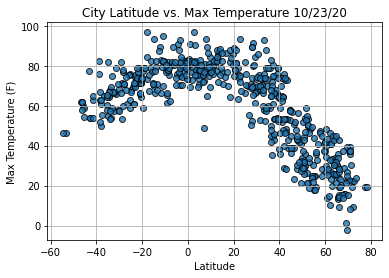

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

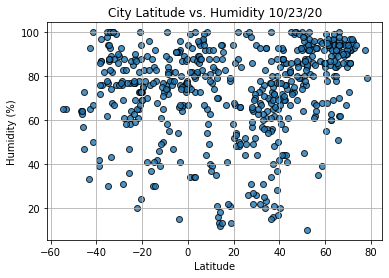

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

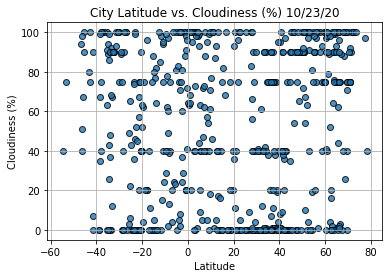

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

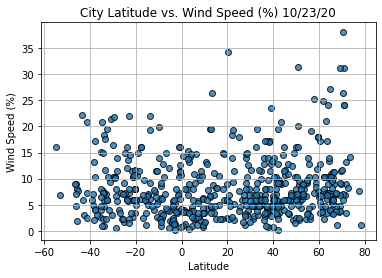

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) " + time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

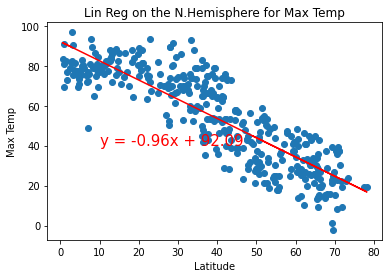

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Lin Reg on the N.Hemisphere for Max Temp", 
                       'Max Temp',(10,40))

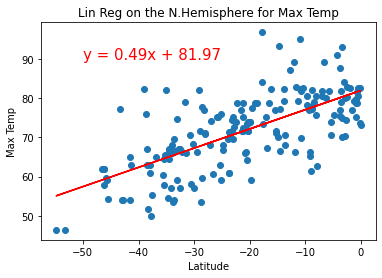

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Lin Reg on the N.Hemisphere for Max Temp",
                       "Max Temp",(-50,90))

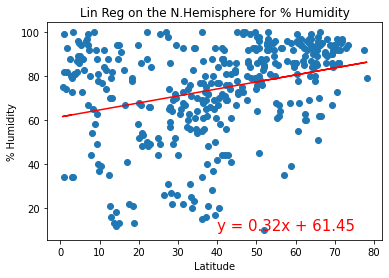

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the N.Hemisphere for % Humidity',
                       '% Humidity',(40,10))

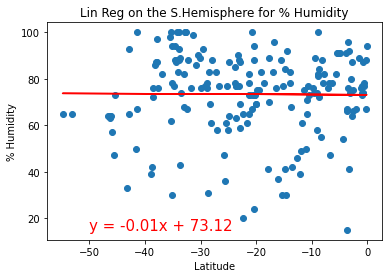

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the S.Hemisphere for % Humidity',
                       '% Humidity',(-50,15))

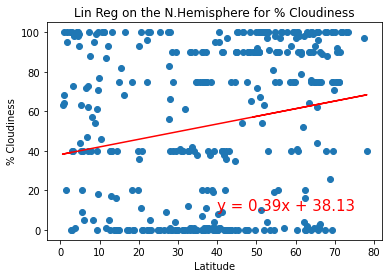

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the N.Hemisphere for % Cloudiness',
                       '% Cloudiness',(40,10))

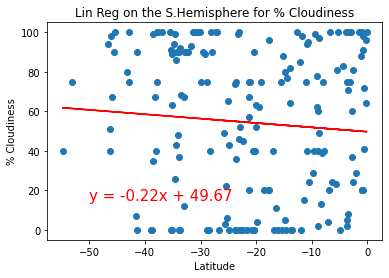

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the S.Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,15))

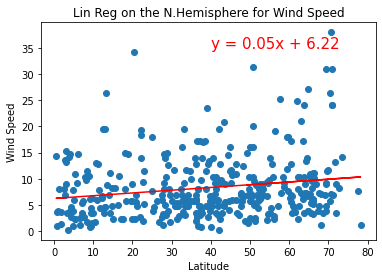

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the N.Hemisphere for Wind Speed',
                       'Wind Speed',(40,35))

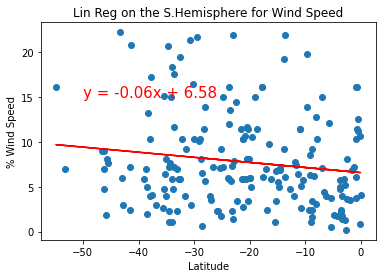

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the S.Hemisphere for Wind Speed',
                       '% Wind Speed',(-50,15))